### Series & DataFrame
판다스는 엑셀의 파이썬 버전이다.
엑셀은 표(table)형태 로 데이터를 저장합니다.
이표가 바로 판다스에서는 DataFrame입니다. Dataframe은 Series를 여러개 붙여서 만들어집니다.

In [10]:
import pandas as pd
import numpy as np

In [11]:
nums= [i for i in range(1,11)]
nums

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### Series 데이터를 생성하는 방법

In [12]:
seriesNums= pd.Series(nums)
seriesNums #rowname으로 인덱스가 생겼다.

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

 애꿎은 list를 Series로 만들어서 뭐하냐
 -> pandas의 다양한 기능을 사용할 수 있다.

In [13]:
seriesNums.mean()

5.5

In [14]:
seriesNums.describe()

count    10.00000
mean      5.50000
std       3.02765
min       1.00000
25%       3.25000
50%       5.50000
75%       7.75000
max      10.00000
dtype: float64

### DataFrame을 생성하는 방법

In [15]:
nums= [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]
dfNums=pd.DataFrame(nums)
print(dfNums)

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9


#### Series와 DataFame 관계
여러개의 Series를 합친게 DataFame이다.

In [16]:
print(type(dfNums))    #판다스의 데이터 프레임

<class 'pandas.core.frame.DataFrame'>


In [17]:
dfNums[0]

0    1
1    4
2    7
Name: 0, dtype: int64

In [18]:
type(dfNums[0]) # 판다스의 시리즈 형태 이것으로 시리즈가 모여 데이터 프레임을 이루는 것을 알 수 있다

pandas.core.series.Series

### DataFrame을 생성하는 다른 방법
 리스트 전달(위에서 했던 방식)

In [19]:
users= [
    ['철수', 180,5],
    ['민수', 170,5],
    ['짱구', 130,5],
]
users

[['철수', 180, 5], ['민수', 170, 5], ['짱구', 130, 5]]

In [20]:
df_users= pd.DataFrame(users)
df_users

,0,1,2
0,철수,180,5
1,민수,170,5
2,짱구,130,5


#### col의 name을 지정해주자 

In [21]:
df_users.columns=['이름','키','나이']
df_users

,이름,키,나이
0,철수,180,5
1,민수,170,5
2,짱구,130,5


#### 딕셔너리로 전달되는 경우

In [22]:
users2=dict(
이름=['철수','민수','짱구'],
키=[180,170,130],
나이=[5,5,5])

In [23]:
df_users2= pd.DataFrame(users2)
print(df_users2)
print(df_users)          #애초에 딕셔너리 형태로 집어 넣으면 문제가 없다.

   이름    키  나이
0  철수  180   5
1  민수  170   5
2  짱구  130   5
   이름    키  나이
0  철수  180   5
1  민수  170   5
2  짱구  130   5


#### 리스트 in 딕셔너리 전달
실제 현업에서는 api요청의 결과로 이런 형식의 데이터 포맷으로 올 가능성이 크다.

In [24]:
users3=[
    dict(이름='철수',키=180,나이=5),
    dict(이름='민수',키=170,나이=5),
    dict(이름='짱구',키=130,나이=5),
]
users3

[{'이름': '철수', '키': 180, '나이': 5},
 {'이름': '민수', '키': 170, '나이': 5},
 {'이름': '짱구', '키': 130, '나이': 5}]

In [25]:
df_users3= pd.DataFrame(users3)
print(df_users3)

   이름    키  나이
0  철수  180   5
1  민수  170   5
2  짱구  130   5


## DataFrame의 행,열,인덱스

In [26]:
sample= pd.read_csv("./dataset/내국인 생활인구.csv", encoding='cp949')
sample

,일자(stdr_de_id),시간(tmzon_pd_se),행정동코드(adstrd_code_se),집계구코드(oa_cd),생활인구합계(tot_lvpop_co),남자0~9세(male_f0t9_lvpop_co),남자10~14세(male_f10t14_lvpop_co),남자15~19세(male_f15t19_lvpop_co),남자20~24세(male_f20t24_lvpop_co),남자25~29세(male_f25t29_lvpop_co),...,여자40~44세(female_f40t44_lvpop_co),여자45~49세(female_f45t49_lvpop_co),여자50~54세(female_f50t54_lvpop_co),여자55~59세(female_f55t59_lvpop_co),여자60~64세(female_f60t64_lvpop_co),여자65~69세(female_f65t69_lvpop_co),여자70~74세(female_f70t74_lvpop_co),여자75~79세(female_f75t79_lvpop_co),여자80세이상(female_above_80_lvpop_co),등록일자(ldadng_dt)
0,20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
1,20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
2,20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
3,20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
4,20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20170603,7,11650560,1122057010104,465.8914,16.4274,4.2056,11.2869,3.5184,14.1803,...,17.2636,4.9406,16.3334,26.8672,1.0048,3.5458,18.9442,13.5570,17.3543,2021-08-17 16:06:44
496,20211007,5,11620525,1111056061002,180.1291,12.6887,8.1278,2.1684,23.3810,5.5894,...,9.7934,23.8109,10.2240,28.3686,9.9961,7.2371,5.7134,15.6473,6.1426,2021-08-17 16:06:44
497,20200819,20,11140635,1121078010101,540.8267,0.7004,14.3413,2.9791,0.2832,13.5837,...,0.0017,13.7260,14.1506,46.9632,10.5080,8.6825,3.9238,3.3179,13.5500,2021-08-17 16:06:44
498,20171011,11,11590605,1121082010004,992.2594,35.4771,8.4071,17.8773,1.2632,1.8164,...,3.9551,28.8403,10.7913,33.7729,1.4717,8.7947,8.5835,9.3403,0.0000,2021-08-17 16:06:44


#### .head() 함수 R데이터의 head() 함수와 같음

In [27]:
sample.head()

,일자(stdr_de_id),시간(tmzon_pd_se),행정동코드(adstrd_code_se),집계구코드(oa_cd),생활인구합계(tot_lvpop_co),남자0~9세(male_f0t9_lvpop_co),남자10~14세(male_f10t14_lvpop_co),남자15~19세(male_f15t19_lvpop_co),남자20~24세(male_f20t24_lvpop_co),남자25~29세(male_f25t29_lvpop_co),...,여자40~44세(female_f40t44_lvpop_co),여자45~49세(female_f45t49_lvpop_co),여자50~54세(female_f50t54_lvpop_co),여자55~59세(female_f55t59_lvpop_co),여자60~64세(female_f60t64_lvpop_co),여자65~69세(female_f65t69_lvpop_co),여자70~74세(female_f70t74_lvpop_co),여자75~79세(female_f75t79_lvpop_co),여자80세이상(female_above_80_lvpop_co),등록일자(ldadng_dt)
0,20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
1,20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
2,20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
3,20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
4,20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44


#### index
인덱스는 책의 목차같은 개념
더 빠르게 검색하고, 데이터를 정렬할 때 사용되는 개념

In [28]:
sample.index

RangeIndex(start=0, stop=500, step=1)

기본 인덱스는 의미가 없음. 여기서는 일자 컬럼을 인덱스로 지정해보자.

In [29]:
sample2=pd.read_csv('./dataset/내국인 생활인구.csv', encoding='cp949', index_col=0) #맨 첫번째 열(columns)을 인덱스로 지정
sample2.head()

,시간(tmzon_pd_se),행정동코드(adstrd_code_se),집계구코드(oa_cd),생활인구합계(tot_lvpop_co),남자0~9세(male_f0t9_lvpop_co),남자10~14세(male_f10t14_lvpop_co),남자15~19세(male_f15t19_lvpop_co),남자20~24세(male_f20t24_lvpop_co),남자25~29세(male_f25t29_lvpop_co),남자30~34세(male_f30t34_lvpop_co),...,여자40~44세(female_f40t44_lvpop_co),여자45~49세(female_f45t49_lvpop_co),여자50~54세(female_f50t54_lvpop_co),여자55~59세(female_f55t59_lvpop_co),여자60~64세(female_f60t64_lvpop_co),여자65~69세(female_f65t69_lvpop_co),여자70~74세(female_f70t74_lvpop_co),여자75~79세(female_f75t79_lvpop_co),여자80세이상(female_above_80_lvpop_co),등록일자(ldadng_dt)
일자(stdr_de_id),,,,,,,,,,,,,,,,,,,,,
20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44


In [30]:
sample3= sample2.set_index("행정동코드(adstrd_code_se)") #행정코드를 인덱스로 사용
sample3.head()

,시간(tmzon_pd_se),집계구코드(oa_cd),생활인구합계(tot_lvpop_co),남자0~9세(male_f0t9_lvpop_co),남자10~14세(male_f10t14_lvpop_co),남자15~19세(male_f15t19_lvpop_co),남자20~24세(male_f20t24_lvpop_co),남자25~29세(male_f25t29_lvpop_co),남자30~34세(male_f30t34_lvpop_co),남자35~39세(male_f35t39_lvpop_co),...,여자40~44세(female_f40t44_lvpop_co),여자45~49세(female_f45t49_lvpop_co),여자50~54세(female_f50t54_lvpop_co),여자55~59세(female_f55t59_lvpop_co),여자60~64세(female_f60t64_lvpop_co),여자65~69세(female_f65t69_lvpop_co),여자70~74세(female_f70t74_lvpop_co),여자75~79세(female_f75t79_lvpop_co),여자80세이상(female_above_80_lvpop_co),등록일자(ldadng_dt)
행정동코드(adstrd_code_se),,,,,,,,,,,,,,,,,,,,,
11320515,4,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,13.5164,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
11380510,22,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,41.6914,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
11680610,6,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,8.7144,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
11305575,7,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,12.7210,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
11740660,6,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,29.4255,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44


In [31]:
sample3.index

Int64Index([11320515, 11380510, 11680610, 11305575, 11740660, 11530750,
            11620735, 11740685, 11260655, 11350611,
            ...
            11590650, 11410565, 11230730, 11440720, 11350670, 11650560,
            11620525, 11140635, 11590605, 11350625],
           dtype='int64', name='행정동코드(adstrd_code_se)', length=500)

### DataFrame 조회(read)
<br> 컬럼명
<br> loc,iloc
<br> indexing과 활용

컬럼명을 사용해서 원하는 컬럼만 뽑아 낼 수 있다.   df[컬럼명]

In [32]:
sample4= pd.read_csv('./dataset/내국인 생활인구.csv', encoding='cp949')
sample4.columns

Index(['일자(stdr_de_id)', '시간(tmzon_pd_se)', '행정동코드(adstrd_code_se)',
       '집계구코드(oa_cd)', '생활인구합계(tot_lvpop_co)', '남자0~9세(male_f0t9_lvpop_co)',
       '남자10~14세(male_f10t14_lvpop_co)', '남자15~19세(male_f15t19_lvpop_co)',
       '남자20~24세(male_f20t24_lvpop_co)', '남자25~29세(male_f25t29_lvpop_co)',
       '남자30~34세(male_f30t34_lvpop_co)', '남자35~39세(male_f35t39_lvpop_co)',
       '남자40~44세(male_f40t44_lvpop_co)', '남자45~49세(male_f45t49_lvpop_co)',
       '남자50~54세(male_f50t54_lvpop_co)', '남자55~59세(male_f55t59_lvpop_co)',
       '남자60~64세(male_f60t64_lvpop_co)', '남자65~69세(male_f65t69_lvpop_co)',
       '남자70~74세(male_f70t74_lvpop_co)', '남자75~79세(male_f75t79_lvpop_co)',
       '남자80세이상(male_above_80_lvpop_co)', '여자0~9세(female_f0t9_lvpop_co)',
       '여자10~14세(female_f10t14_lvpop_co)', '여자15~19세(female_f15t19_lvpop_co)',
       '여자20~24세(female_f20t24_lvpop_co)', '여자25~29세(female_f25t29_lvpop_co)',
       '여자30~34세(female_f30t34_lvpop_co)', '여자35~39세(female_f35t39_lvpop_co)',
       '여자40~44세(f

#### 파이썬의 split 함수를 사용하여 sample4의 columns의 불필요한 부분을  잘라내고 재 할장 해주기

In [33]:
#파이썬의 split 함수를 사용
"안녕(hello)".split('(')

['안녕', 'hello)']

In [34]:
newCols=[]
cols= sample4.columns

for col in cols:
    newCols.append(col.split("(")[0])
newCols

['일자',
 '시간',
 '행정동코드',
 '집계구코드',
 '생활인구합계',
 '남자0~9세',
 '남자10~14세',
 '남자15~19세',
 '남자20~24세',
 '남자25~29세',
 '남자30~34세',
 '남자35~39세',
 '남자40~44세',
 '남자45~49세',
 '남자50~54세',
 '남자55~59세',
 '남자60~64세',
 '남자65~69세',
 '남자70~74세',
 '남자75~79세',
 '남자80세이상',
 '여자0~9세',
 '여자10~14세',
 '여자15~19세',
 '여자20~24세',
 '여자25~29세',
 '여자30~34세',
 '여자35~39세',
 '여자40~44세',
 '여자45~49세',
 '여자50~54세',
 '여자55~59세',
 '여자60~64세',
 '여자65~69세',
 '여자70~74세',
 '여자75~79세',
 '여자80세이상',
 '등록일자']

In [35]:
sample4.columns=newCols
sample4.head()

,일자,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
0,20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
1,20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
2,20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
3,20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
4,20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44


#### '일자'를 인덱스로 설정

In [36]:
sample4= sample4.set_index('일자')
sample4.head()

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44


In [37]:
sample4['시간']

일자
20170226     4
20180107    22
20180317     6
20190222     7
20210706     6
            ..
20170603     7
20211007     5
20200819    20
20171011    11
20200725    21
Name: 시간, Length: 500, dtype: int64

#### 2개 이상의 컬럼을 동시에 조회하고 싶으면 리스트 형태로 전달

In [38]:
sample4[['시간','집계구코드']]

,시간,집계구코드
일자,,
20170226,4,1125061020007
20180107,22,1115071010309
20180317,6,1113073020101
20190222,7,1106071020403
20210706,6,1107073040015
...,...,...
20170603,7,1122057010104
20211007,5,1111056061002
20200819,20,1121078010101


#### loc, iloc 함수
두 함수를 사용하여 원하는 행 또는 열에 인덱싱, 슬라이싱이 가능하다.
<br> *loc[행인덱스]->row조회
<br> *loc[행인덱스, 칼럼명] -> row&column 조회
<br>
<br> *iloc[행인덱스번호] -> row조회
<br> *iloc[행인덱스번호,열인덱스번호] -> row&column 조회

In [39]:
sample4.head()

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44


#### loc[행인덱스] -> row조회

In [40]:
sample4.loc[20170226:20180317] #파이썬에서는 20180317-1 까지 가져오지만 loc는 아니다

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44


#### loc[행인덱스, 칼럼명] -> row&column 조회

In [41]:
sample4.loc[:,["시간","생활인구합계"]] # 모든 행의 시간과 생활인구합계 단 두개의 열을 가져온다

,시간,생활인구합계
일자,,
20170226,4,4.3097
20180107,22,338.3900
20180317,6,1805.5256
20190222,7,504.4956
20210706,6,744.6219
...,...,...
20170603,7,465.8914
20211007,5,180.1291
20200819,20,540.8267


In [42]:
sample4.loc[:,"시간":"생활인구합계"] # 모든 행을 시간부터 생활인구합계 까지의 열을 가져온다.

,시간,행정동코드,집계구코드,생활인구합계
일자,,,,
20170226,4,11320515,1125061020007,4.3097
20180107,22,11380510,1115071010309,338.3900
20180317,6,11680610,1113073020101,1805.5256
20190222,7,11305575,1106071020403,504.4956
20210706,6,11740660,1107073040015,744.6219
...,...,...,...,...
20170603,7,11650560,1122057010104,465.8914
20211007,5,11620525,1111056061002,180.1291
20200819,20,11140635,1121078010101,540.8267


#### iloc[행인덱스번호] -> row조회

In [43]:
sample4.iloc[1:3] #이경우 3-1까지이다.

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
일자,,,,,,,,,,,,,,,,,,,,,
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44


#### iloc[행인덱스번호,열인덱스번호] -> row&column 조회

In [44]:
sample4.iloc[:,1:3] #모든 행을 1번 2번 인덱스의 열을 불러온다.

,행정동코드,집계구코드
일자,,
20170226,11320515,1125061020007
20180107,11380510,1115071010309
20180317,11680610,1113073020101
20190222,11305575,1106071020403
20210706,11740660,1107073040015
...,...,...
20170603,11650560,1122057010104
20211007,11620525,1111056061002
20200819,11140635,1121078010101


In [45]:
sample4.head()

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44


#### 생활인구합계가 1000 이상인 데이터만 가져오고 싶다면?

In [46]:
sample4['생활인구합계'] >= 1000

일자
20170226    False
20180107    False
20180317     True
20190222    False
20210706    False
            ...  
20170603    False
20211007    False
20200819    False
20171011    False
20200725     True
Name: 생활인구합계, Length: 500, dtype: bool

#### 생활인구합계가 1000이상인 데이터들을 전부를 가져오는 방법

In [47]:
sample4[sample4['생활인구합계'] >= 1000]

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
일자,,,,,,,,,,,,,,,,,,,,,
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
20170408,8,11740685,1119066010105,1079.7134,4.0917,10.8796,12.4219,1.6562,21.9264,60.8998,...,10.8313,23.4527,4.1431,22.1996,26.9575,8.3431,14.4447,48.9427,0.0104,2021-08-17 16:06:44
20200614,1,11260655,1125067010020,1036.2064,40.3825,1.7486,39.8508,29.1526,4.6644,4.8052,...,22.9719,12.4215,73.2060,4.0706,20.4086,14.1957,12.4370,4.9715,4.1581,2021-08-17 16:06:44
20201222,22,11350611,1111078010103,1364.5008,14.9106,4.2902,0.0000,9.8438,111.6884,91.9557,...,28.9179,0.1007,2.4184,26.5816,6.5845,1.4204,7.7075,0.0000,6.3707,2021-08-17 16:06:44
20190721,7,11530730,1106090030013,2327.7078,17.3709,0.0001,30.8019,0.8422,15.7040,2.2680,...,69.5434,6.9826,0.0000,24.8227,16.4284,9.6311,2.4498,6.1293,135.2059,2021-08-17 16:06:44
20210909,8,11710531,1124082020501,1386.5192,4.4293,2.9420,39.6386,49.4549,16.6462,3.1906,...,52.5776,102.9158,2.5967,19.8164,1.0700,21.9317,17.1770,5.4685,15.1598,2021-08-17 16:06:44
20180726,13,11290760,1107052020003,1434.0143,2.0398,15.1825,19.4212,5.1919,4.8996,4.6031,...,1.3943,16.0489,25.3726,8.4143,6.3157,8.2121,11.9664,9.9346,11.2276,2021-08-17 16:06:44
20170531,0,11620585,1122057020020,1990.2866,4.4616,18.0789,26.7599,2.9089,3.2441,51.5304,...,28.5016,15.4471,15.8105,20.5129,16.7786,65.6481,0.1607,10.8671,5.1480,2021-08-17 16:06:44
20210125,18,11230660,1117071050004,1236.1459,16.4584,8.1088,8.0762,33.7676,21.3094,14.7762,...,1.1522,37.2469,6.6728,37.6457,34.6523,0.0000,5.7561,8.9008,2.4971,2021-08-17 16:06:44


In [48]:
sample4.loc[sample4['생활인구합계']>=1000]

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
일자,,,,,,,,,,,,,,,,,,,,,
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
20170408,8,11740685,1119066010105,1079.7134,4.0917,10.8796,12.4219,1.6562,21.9264,60.8998,...,10.8313,23.4527,4.1431,22.1996,26.9575,8.3431,14.4447,48.9427,0.0104,2021-08-17 16:06:44
20200614,1,11260655,1125067010020,1036.2064,40.3825,1.7486,39.8508,29.1526,4.6644,4.8052,...,22.9719,12.4215,73.2060,4.0706,20.4086,14.1957,12.4370,4.9715,4.1581,2021-08-17 16:06:44
20201222,22,11350611,1111078010103,1364.5008,14.9106,4.2902,0.0000,9.8438,111.6884,91.9557,...,28.9179,0.1007,2.4184,26.5816,6.5845,1.4204,7.7075,0.0000,6.3707,2021-08-17 16:06:44
20190721,7,11530730,1106090030013,2327.7078,17.3709,0.0001,30.8019,0.8422,15.7040,2.2680,...,69.5434,6.9826,0.0000,24.8227,16.4284,9.6311,2.4498,6.1293,135.2059,2021-08-17 16:06:44
20210909,8,11710531,1124082020501,1386.5192,4.4293,2.9420,39.6386,49.4549,16.6462,3.1906,...,52.5776,102.9158,2.5967,19.8164,1.0700,21.9317,17.1770,5.4685,15.1598,2021-08-17 16:06:44
20180726,13,11290760,1107052020003,1434.0143,2.0398,15.1825,19.4212,5.1919,4.8996,4.6031,...,1.3943,16.0489,25.3726,8.4143,6.3157,8.2121,11.9664,9.9346,11.2276,2021-08-17 16:06:44
20170531,0,11620585,1122057020020,1990.2866,4.4616,18.0789,26.7599,2.9089,3.2441,51.5304,...,28.5016,15.4471,15.8105,20.5129,16.7786,65.6481,0.1607,10.8671,5.1480,2021-08-17 16:06:44
20210125,18,11230660,1117071050004,1236.1459,16.4584,8.1088,8.0762,33.7676,21.3094,14.7762,...,1.1522,37.2469,6.6728,37.6457,34.6523,0.0000,5.7561,8.9008,2.4971,2021-08-17 16:06:44


#### 생활인구합계가 1000이상이고, 행정동코드가 11680610인 데이터만 뽑아내자

In [49]:
condition= (sample4['생활인구합계'] >= 1000) & (sample4['행정동코드']==11680610)
condition

일자
20170226    False
20180107    False
20180317     True
20190222    False
20210706    False
            ...  
20170603    False
20211007    False
20200819    False
20171011    False
20200725    False
Length: 500, dtype: bool

In [50]:
sample4[condition]

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
일자,,,,,,,,,,,,,,,,,,,,,
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
20210912,18,11680610,1101067020003,1256.1622,14.6004,2.7720,42.3772,17.0723,0.0000,1.8279,...,14.0487,15.6679,8.4220,3.0203,14.0333,6.2122,17.1422,5.2644,0.7601,2021-08-17 16:06:44
20210715,22,11680610,1125067010014,2556.0814,7.6816,11.3859,10.7294,22.2396,7.6053,40.2110,...,7.2711,11.9893,1.8917,20.5252,21.7313,39.0403,0.8007,18.6659,64.2800,2021-08-17 16:06:44


### DataFrame 수정 (update)
<ul>  새로운 열추가
<ul>  데이터수정

#### 새로운 열 추가

In [51]:
sample4.head()

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44


In [52]:
sample4['인구밀집지']= True
sample4.head()

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자,인구밀집지
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44,True
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44,True
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44,True
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44,True
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44,True


### 데이터 수정
생활인구 합계가 1000 이상인 곳만 인구 밀집지로 지정하자.

In [53]:
sample4['생활인구합계']>=1000

일자
20170226    False
20180107    False
20180317     True
20190222    False
20210706    False
            ...  
20170603    False
20211007    False
20200819    False
20171011    False
20200725     True
Name: 생활인구합계, Length: 500, dtype: bool

In [54]:
sample4['인구밀집지']= sample4['생활인구합계'] >= 1000
sample4

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자,인구밀집지
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44,False
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44,False
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44,True
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44,False
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20170603,7,11650560,1122057010104,465.8914,16.4274,4.2056,11.2869,3.5184,14.1803,118.0419,...,4.9406,16.3334,26.8672,1.0048,3.5458,18.9442,13.5570,17.3543,2021-08-17 16:06:44,False
20211007,5,11620525,1111056061002,180.1291,12.6887,8.1278,2.1684,23.3810,5.5894,9.8739,...,23.8109,10.2240,28.3686,9.9961,7.2371,5.7134,15.6473,6.1426,2021-08-17 16:06:44,False
20200819,20,11140635,1121078010101,540.8267,0.7004,14.3413,2.9791,0.2832,13.5837,16.8523,...,13.7260,14.1506,46.9632,10.5080,8.6825,3.9238,3.3179,13.5500,2021-08-17 16:06:44,False


In [55]:
sample4.iloc[0,1]= 100
sample4

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자,인구밀집지
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,100,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44,False
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44,False
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44,True
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44,False
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20170603,7,11650560,1122057010104,465.8914,16.4274,4.2056,11.2869,3.5184,14.1803,118.0419,...,4.9406,16.3334,26.8672,1.0048,3.5458,18.9442,13.5570,17.3543,2021-08-17 16:06:44,False
20211007,5,11620525,1111056061002,180.1291,12.6887,8.1278,2.1684,23.3810,5.5894,9.8739,...,23.8109,10.2240,28.3686,9.9961,7.2371,5.7134,15.6473,6.1426,2021-08-17 16:06:44,False
20200819,20,11140635,1121078010101,540.8267,0.7004,14.3413,2.9791,0.2832,13.5837,16.8523,...,13.7260,14.1506,46.9632,10.5080,8.6825,3.9238,3.3179,13.5500,2021-08-17 16:06:44,False


### 사실 수정은,,, 조회 문법에 대입 연산자만(=)만 넣으면 끝이다.

## DataFrame 삭제 (delete)

In [56]:
sample4.head()

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자,인구밀집지
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,100,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44,False
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44,False
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44,True
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44,False
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44,False


#### 컬럼(columns) 삭제

#### axis=0 , axis=1 0은 row 1은 col을 의미

In [57]:
sample4.drop(['인구밀집지','등록일자'],axis=1)

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자35~39세,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,100,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,26.6858,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,28.1586,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,13.5087,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,8.0677,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,0.7319,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20170603,7,11650560,1122057010104,465.8914,16.4274,4.2056,11.2869,3.5184,14.1803,118.0419,...,8.4197,17.2636,4.9406,16.3334,26.8672,1.0048,3.5458,18.9442,13.5570,17.3543
20211007,5,11620525,1111056061002,180.1291,12.6887,8.1278,2.1684,23.3810,5.5894,9.8739,...,15.3728,9.7934,23.8109,10.2240,28.3686,9.9961,7.2371,5.7134,15.6473,6.1426
20200819,20,11140635,1121078010101,540.8267,0.7004,14.3413,2.9791,0.2832,13.5837,16.8523,...,25.1931,0.0017,13.7260,14.1506,46.9632,10.5080,8.6825,3.9238,3.3179,13.5500


#### sample4에서 20170226에 해당하는 row 삭제

In [58]:
sample4.drop([20170226],axis=0)

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자,인구밀집지
일자,,,,,,,,,,,,,,,,,,,,,
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44,False
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44,True
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44,False
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44,False
20170801,1,11530750,1123065020005,265.0386,4.6381,2.6234,15.7882,1.6462,23.5687,1.3778,...,10.4536,10.7581,2.3868,17.6019,1.1360,3.6187,4.5029,5.1927,2021-08-17 16:06:44,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20170603,7,11650560,1122057010104,465.8914,16.4274,4.2056,11.2869,3.5184,14.1803,118.0419,...,4.9406,16.3334,26.8672,1.0048,3.5458,18.9442,13.5570,17.3543,2021-08-17 16:06:44,False
20211007,5,11620525,1111056061002,180.1291,12.6887,8.1278,2.1684,23.3810,5.5894,9.8739,...,23.8109,10.2240,28.3686,9.9961,7.2371,5.7134,15.6473,6.1426,2021-08-17 16:06:44,False
20200819,20,11140635,1121078010101,540.8267,0.7004,14.3413,2.9791,0.2832,13.5837,16.8523,...,13.7260,14.1506,46.9632,10.5080,8.6825,3.9238,3.3179,13.5500,2021-08-17 16:06:44,False


### 판다스는 데이터 보호를 위해 drop메서드를 사용했따고 해서, 원본 데이터를 삭제하지는 않는다

In [59]:
sample4.head() #20170226 row가 살아있음

,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,남자30~34세,...,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자,인구밀집지
일자,,,,,,,,,,,,,,,,,,,,,
20170226,4,100,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,13.4910,...,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44,False
20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,8.4651,...,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44,False
20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,1.2299,...,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44,True
20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,27.6958,...,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44,False
20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,115.6026,...,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44,False


### 시각화
matplotlib을 사용하여 기본적인 그래프를 만들 수 있다.

1.    라인 플롯(line plot)
2.    스캐터플롯(scatter plot)
3.    컨투어 플롯(contour plot)
4.    서피스 플롯(surface plot)
5.    바 차트(bar chart)
6.    히스토그램(histogram)
7.    박스 플롯(box plot)
등 다양한 그래프를 만들 수 있는데,

사실 사용법은 필요에 따라 검색해서 그때 그때 익히면 된다.
여기서는 라인 플롯을 기준으로 그래프 사이즈, 레이블 설정 등 기본적인 사용법을 위주로 살펴본다.


In [60]:
import matplotlib.pyplot as plt

In [61]:
sample= pd.read_csv('./dataset/내국인 생활인구.csv', encoding='cp949')
a= [i.split('(')[0] for i in sample.columns]
sample.columns= a
#sample=sample.set_index('일자')
sample.head()

,일자,시간,행정동코드,집계구코드,생활인구합계,남자0~9세,남자10~14세,남자15~19세,남자20~24세,남자25~29세,...,여자40~44세,여자45~49세,여자50~54세,여자55~59세,여자60~64세,여자65~69세,여자70~74세,여자75~79세,여자80세이상,등록일자
0,20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
1,20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
2,20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
3,20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
4,20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44


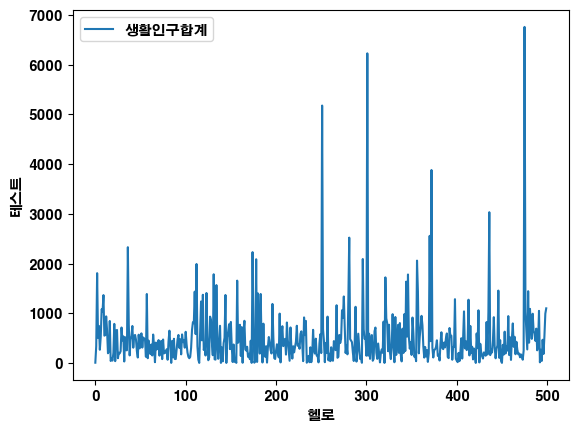

In [62]:
from matplotlib import font_manager, rc
font_name= font_manager.FontProperties(fname='C:\Windows\Fonts\H2GTRE.TTF').get_name()
rc('font',family=font_name)

sample['생활인구합계'].plot(label='생활인구합계', xlabel="헬로", ylabel='테스트')
plt.legend()

## 그래프 사이즈 조절

6759.4381


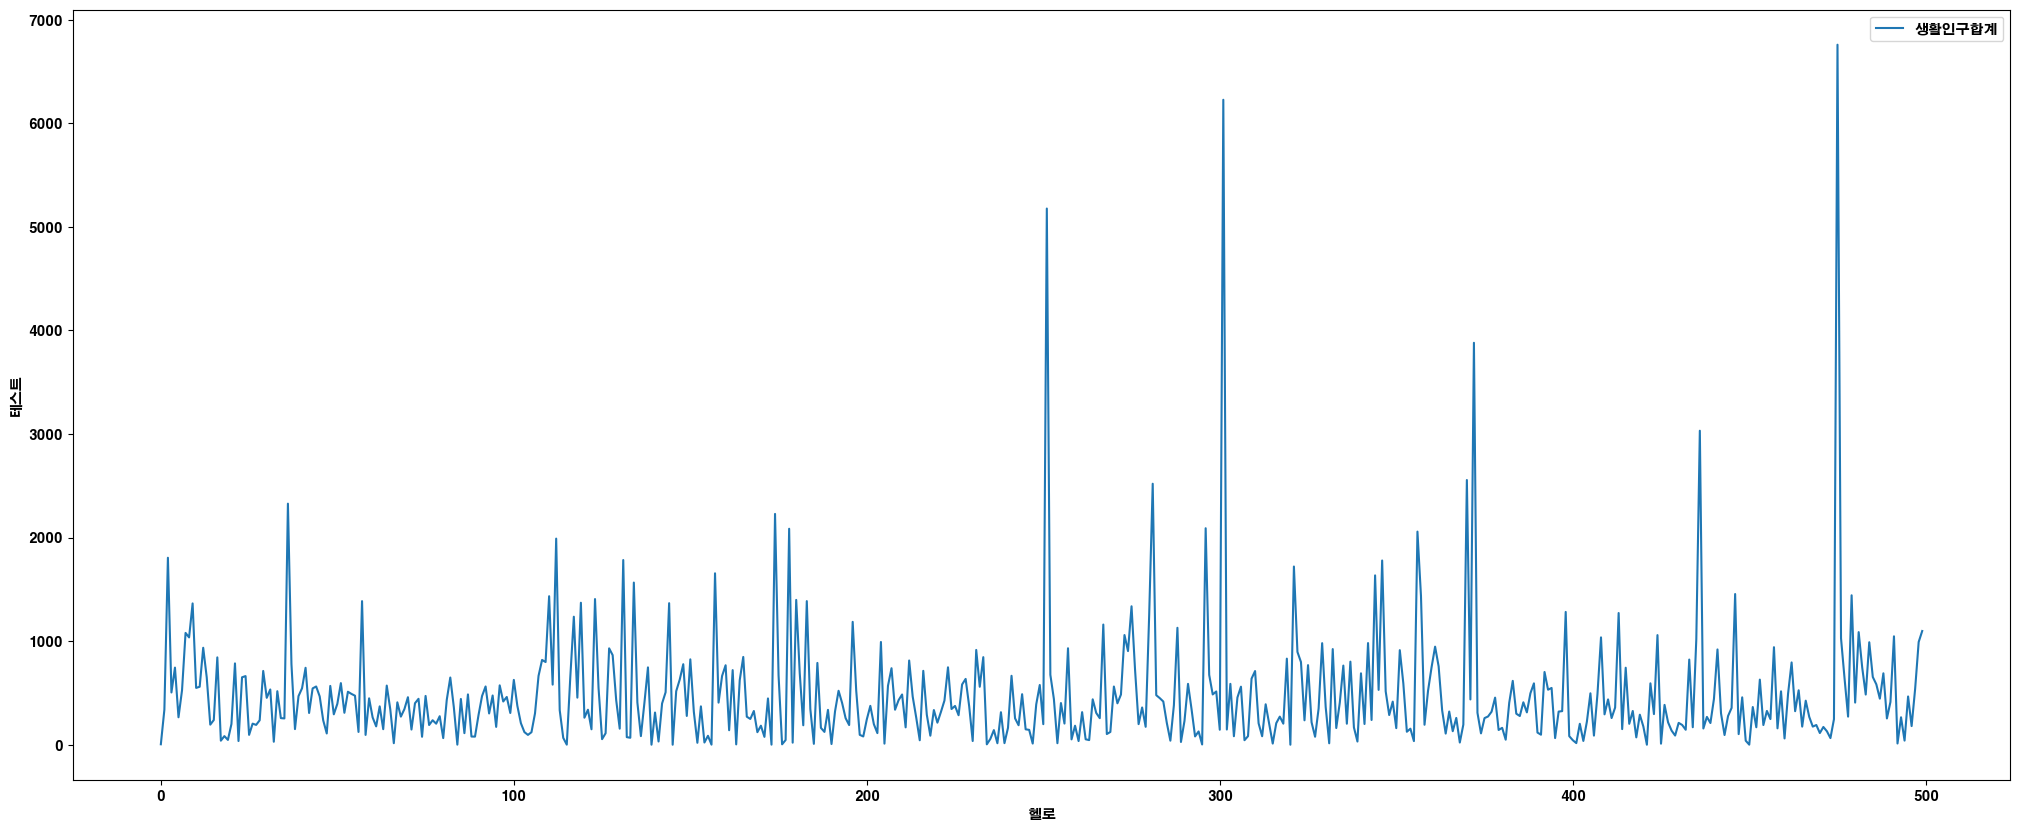

In [63]:
plt.figure(figsize=(25,10)) #figure라는게 그래프를 그리는 한장의 도화지라고 생각하면 된단다.
sample['생활인구합계'].plot(label='생활인구합계', xlabel="헬로", ylabel='테스트')
plt.legend()
print(max(sample['생활인구합계']))

### 여러개 그래프를 한번에

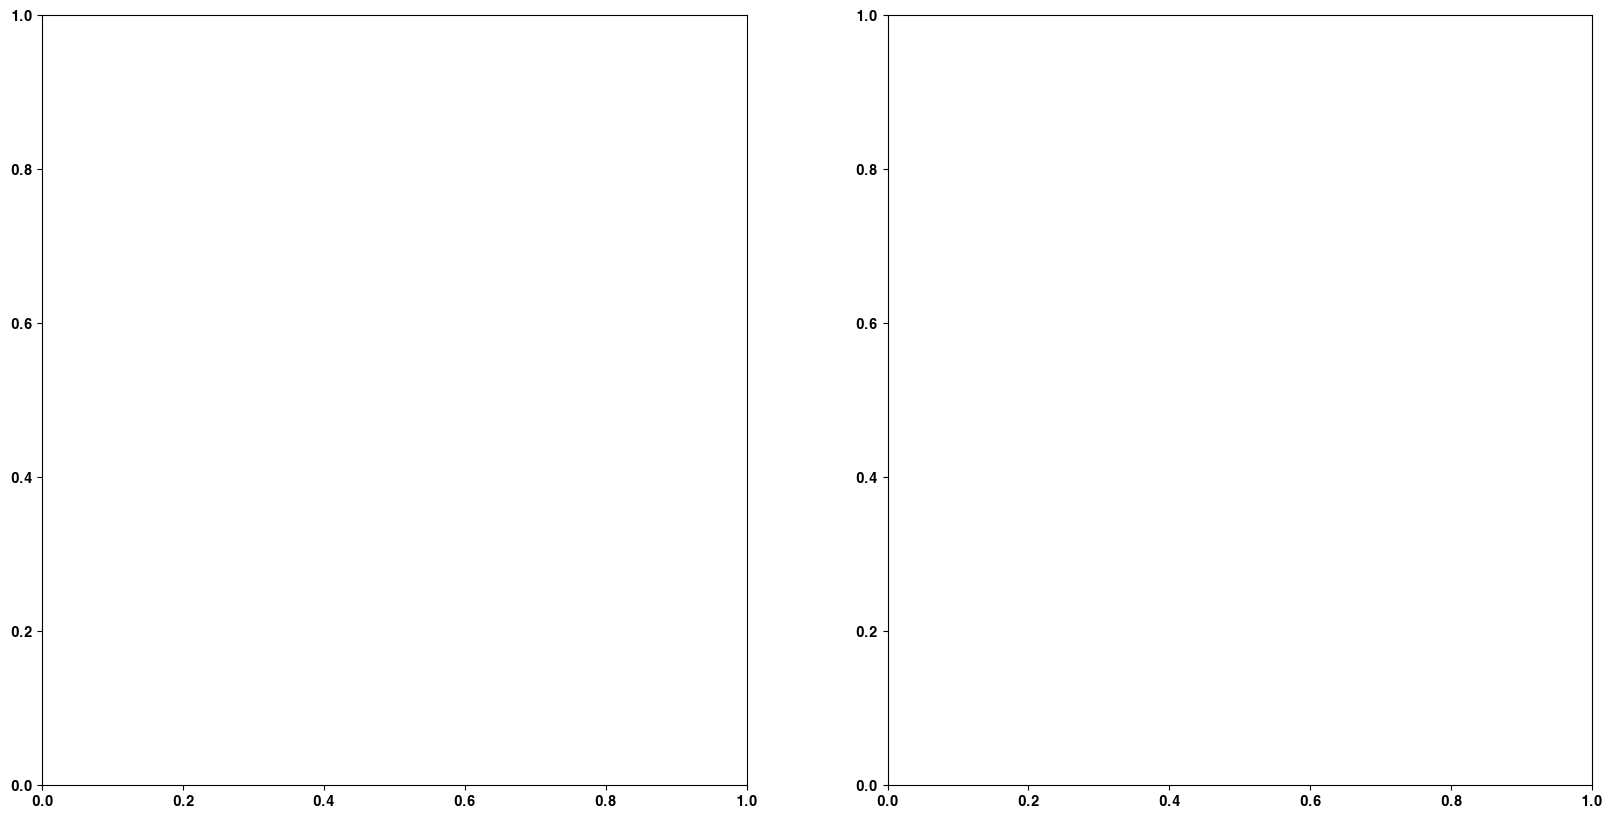

In [103]:
figure, (ax1,ax2)=plt.subplots(nrows=1, ncols=2, figsize=(20,10)) #도화지에 1개의 row에 2개의 그래프  사이즈는 가로 20 세로 10 ax1, ax2를 그린다

<AxesSubplot:xlabel='생활인구합계'>

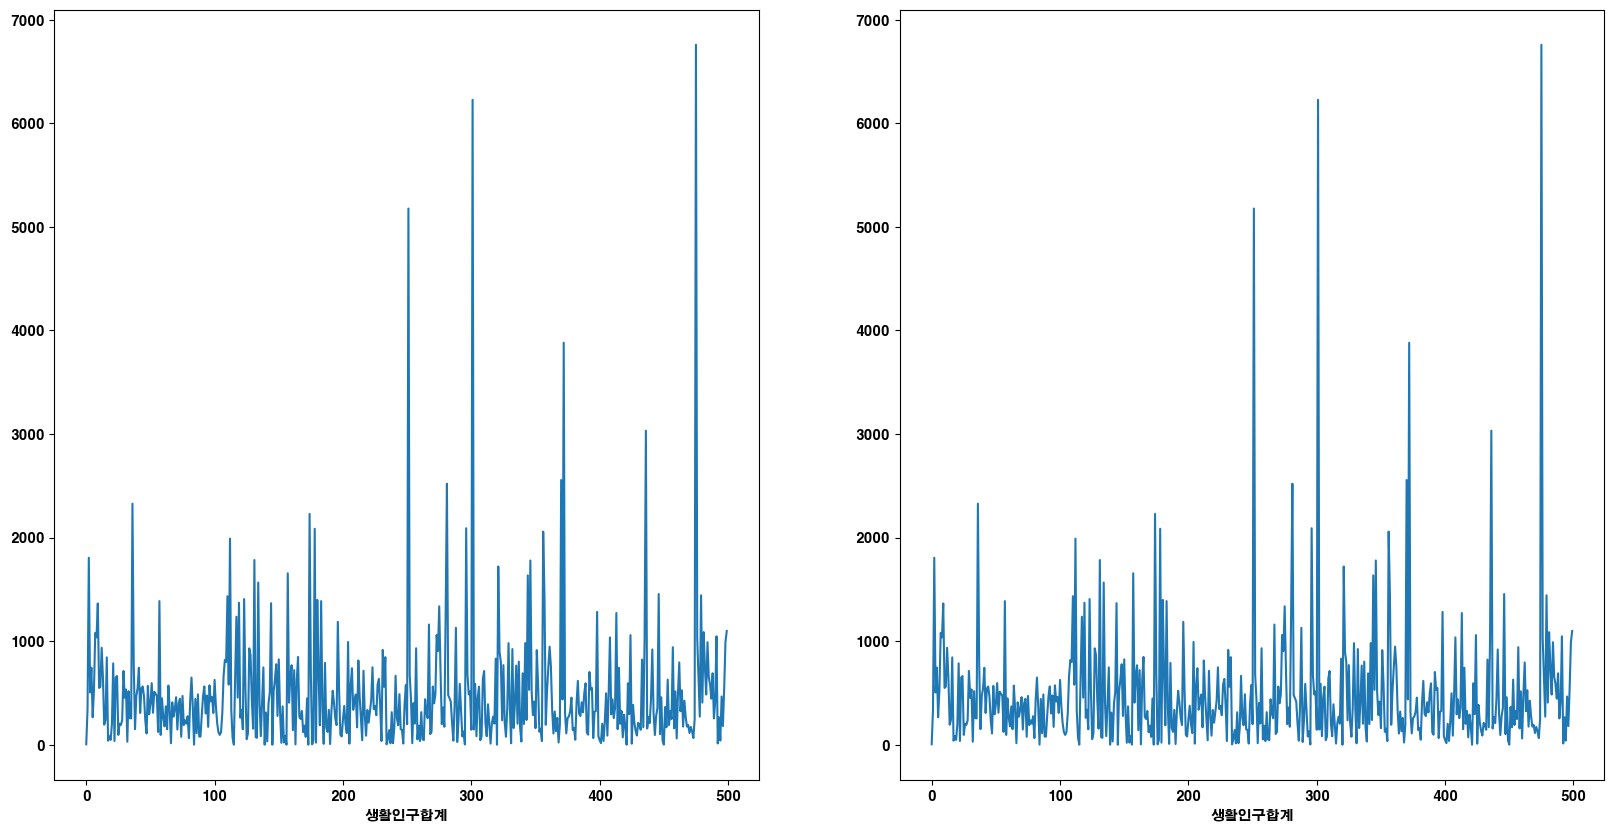

In [69]:
figure, (ax1,ax2)=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sample['생활인구합계'].plot(ax=ax1, xlabel='생활인구합계')

sample['생활인구합계'].plot(ax=ax2, xlabel='생활인구합계')


# 데이터 구간 나누기 cut, qcut

### cut(array, bins, lable)

In [28]:
import pandas as pd
import numpy as np

a= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])

b= pd.crosstab(pd.cut(a,bins=[i for i in np.arange(0,16,5)]), rownames=['경계'], colnames=['도수'],columns='도수')
b['도수']

경계
(0, 5]      5
(5, 10]     5
(10, 15]    4
Name: 도수, dtype: int64